In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr

df = pd.read_csv("heart.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [2]:
cdc_survey_data = pd.read_csv("heart_2022_no_nans.csv")

print(cdc_survey_data.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack   ...    HeightInMeters  \
0         9.0           

In [49]:
NHN_survey = pd.read_csv("Data Sheet 1.CSV")

print(NHN_survey.head())


   Unnamed: 0       Year     seqn  age     sex    eth        marital  poverty  \
0           1  2005-2006  31131.0   44  Female  black        Married     4.65   
1           2  2005-2006  31132.0   70    Male  white        Married     5.00   
2           3  2005-2006  31144.0   21    Male  other  Never married     0.46   
3           4  2005-2006  31149.0   85  Female  white        Widowed     0.05   
4           5  2005-2006  31150.0   79    Male  white       Divorced     1.22   

                         edu     PHQ9     ...       time mortstat_1  \
0  some college or AA degree  Minimal     ...        159          1   
1  college graduate or above  Minimal     ...        167          1   
2       high school graduate  Minimal     ...        163          1   
3               9-11th grade  Minimal     ...        100          2   
4       high school graduate  Minimal     ...         56          2   

  status_all Diseases_of_heart_1  status_heart CV_mortality_1 status_CV  \
0          

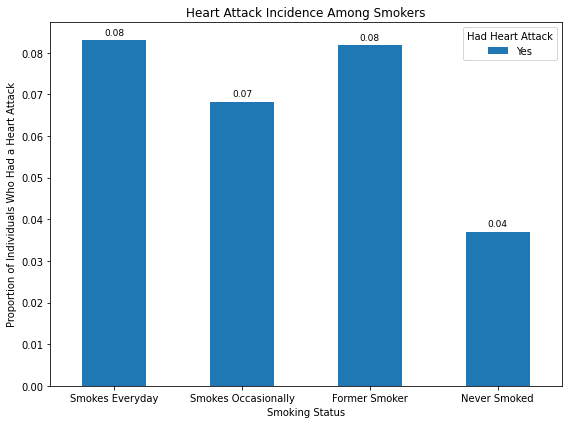

In [3]:
#Lifestyle

# SMOKING 
category_order = ["Yes"]
crosstab = pd.crosstab(cdc_survey_data["SmokerStatus"], cdc_survey_data["HadHeartAttack"], normalize="index") 
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["Smokes Everyday","Smokes Occasionally", "Former Smoker", "Never Smoked", ], rotation=0)

x.set_xlabel("Smoking Status")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Incidence Among Smokers")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



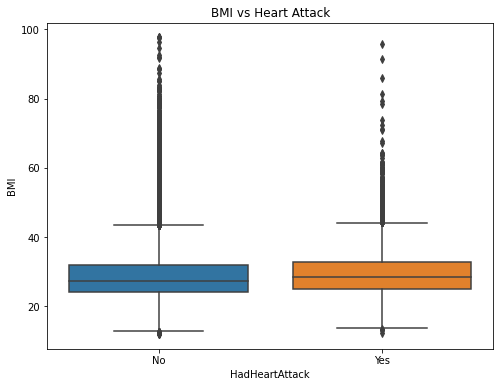

In [4]:
#BMI
plt.figure(figsize=(8,6))
sns.boxplot(x='HadHeartAttack', y='BMI', data= cdc_survey_data)
plt.title('BMI vs Heart Attack')
plt.show()

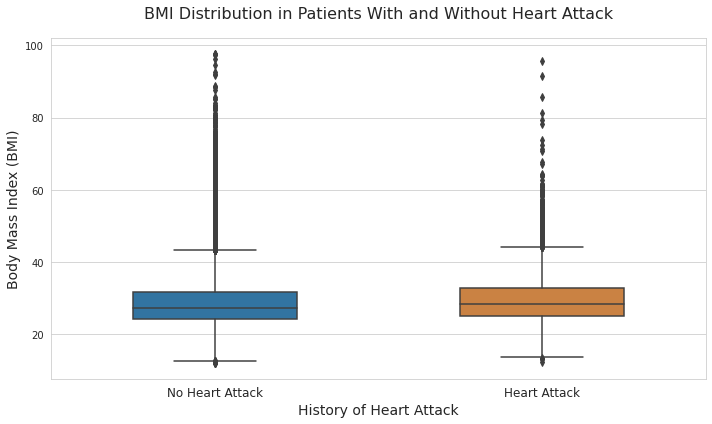

In [5]:
#BMI
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create an improved boxplot
ax = sns.boxplot(x="HadHeartAttack", y="BMI", 
                data=cdc_survey_data,  
                palette=["#1f77b4", "#E1812C"],
                width=0.5,
               )



plt.title("BMI Distribution in Patients With and Without Heart Attack", fontsize=16, pad=20)
plt.xlabel("History of Heart Attack", fontsize=14)
plt.ylabel("Body Mass Index (BMI)", fontsize=14)

plt.xticks([0, 1], ["No Heart Attack", "Heart Attack"], fontsize=12)




plt.tight_layout()
plt.show()


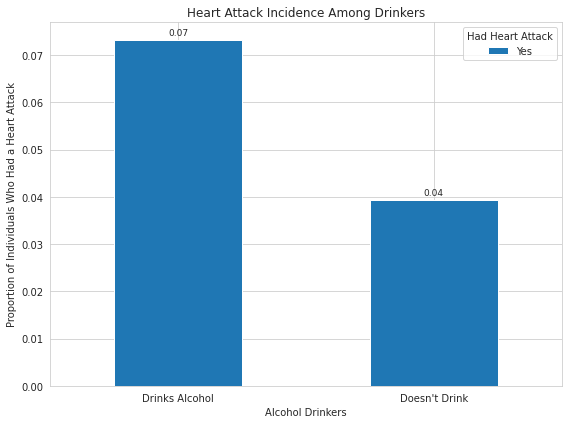

In [6]:
#ALCHOL 
category_order = ["Yes"]
crosstab = pd.crosstab(cdc_survey_data["AlcoholDrinkers"], cdc_survey_data["HadHeartAttack"], normalize="index") 
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["Drinks Alcohol", "Doesn't Drink", ], rotation=0)

x.set_xlabel("Alcohol Drinkers")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Incidence Among Drinkers")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()




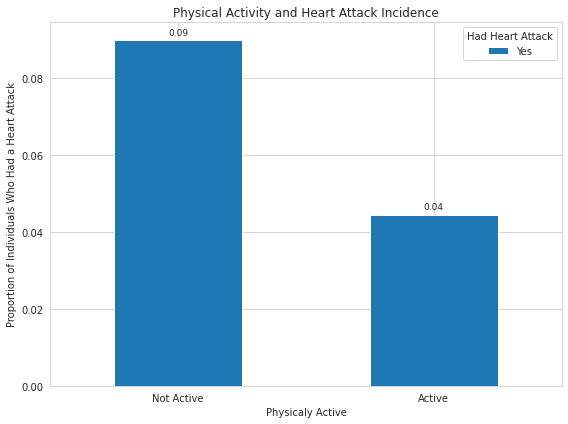

In [7]:
#Physical Activities
category_order = ["Yes"]
crosstab = pd.crosstab(cdc_survey_data["PhysicalActivities"], cdc_survey_data["HadHeartAttack"], normalize="index") 
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["Not Active", "Active", ], rotation=0)

x.set_xlabel("Physicaly Active")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Physical Activity and Heart Attack Incidence")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



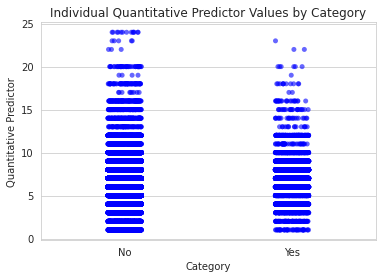

In [8]:
sns.stripplot(x='HadHeartAttack', y='SleepHours', data=cdc_survey_data, jitter=True, color='blue', alpha=0.6)

plt.title('Individual Quantitative Predictor Values by Category')
plt.xlabel('Category')
plt.ylabel('Quantitative Predictor')
plt.show()

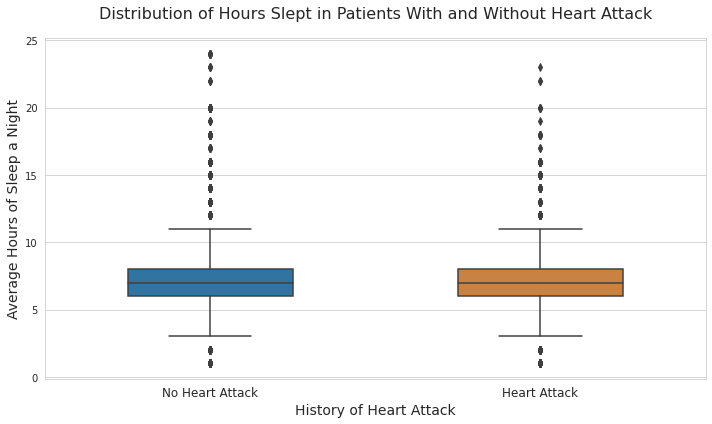

In [9]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create an improved boxplot
ax = sns.boxplot(x="HadHeartAttack", y="SleepHours", 
                data=cdc_survey_data,  
                palette=["#1f77b4", "#E1812C"],
                width=0.5,
               )



plt.title("Distribution of Hours Slept in Patients With and Without Heart Attack", fontsize=16, pad=20)
plt.xlabel("History of Heart Attack", fontsize=14)
plt.ylabel("Average Hours of Sleep a Night", fontsize=14)

plt.xticks([0, 1], ["No Heart Attack", "Heart Attack"], fontsize=12)




plt.tight_layout()
plt.show()

In [48]:
predictor = cdc_survey_data["SleepHours"]
outcome = cdc_survey_data["HadHeartAttack"]

heart_attack_binary = [1 if val.lower() == 'yes' else 0 for val in outcome]
correlation, p_value = pointbiserialr(heart_attack_binary, predictor)

print("Point-Biserial Correlation:", correlation)
print("P-value:", p_value)

Point-Biserial Correlation: 0.0036309227895033446
P-value: 0.07170974442524082


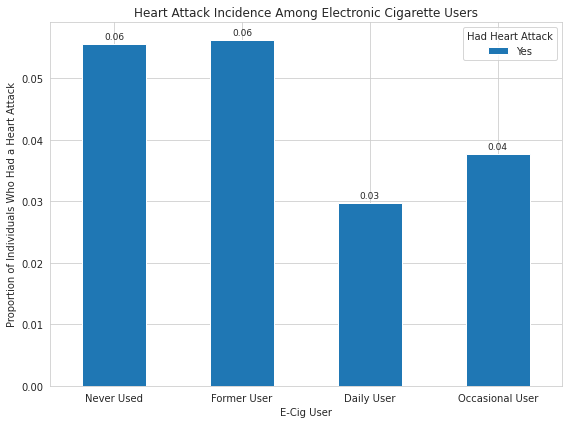

In [26]:
# ECig
category_order = ["Yes"]
crosstab = pd.crosstab(cdc_survey_data["ECigaretteUsage"], cdc_survey_data["HadHeartAttack"], normalize="index") 
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["Never Used","Former User", "Daily User", "Occasional User", ], rotation=0)

x.set_xlabel("E-Cig User")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Incidence Among Electronic Cigarette Users")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

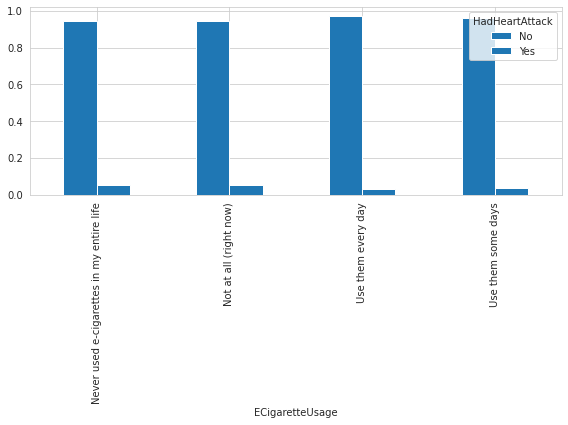

In [11]:

crosstab = pd.crosstab(cdc_survey_data["ECigaretteUsage"], cdc_survey_data["HadHeartAttack"], normalize="index") 


x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))


plt.tight_layout()
plt.show()

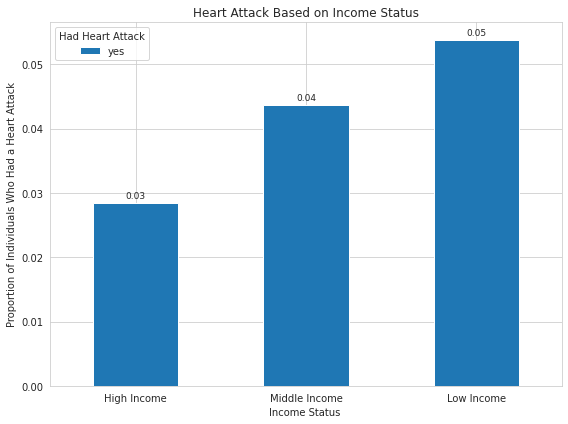

In [59]:
# Socioeconomic Status
desired_order = ["high income", "middle income","low income"]
crosstab = pd.crosstab(NHN_survey["PIR"], NHN_survey["heart.attack"], normalize="index") 
crosstab = crosstab.loc[desired_order]

category_order = ["yes"]
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["High Income","Middle Income", "Low Income"], rotation=0)

x.set_xlabel("Income Status ")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Based on Income Status")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


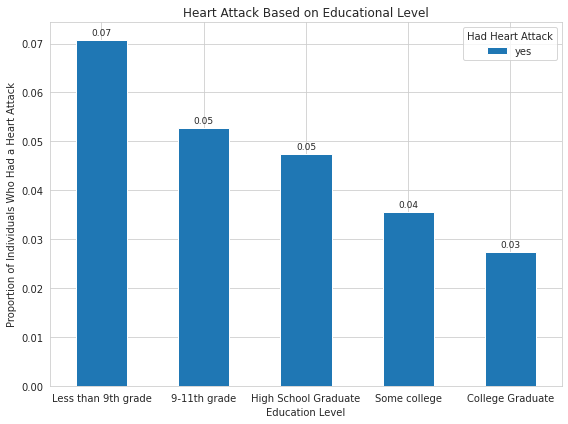

In [62]:
desired_order = ["less than 9th grade","9-11th grade", "high school graduate","some college or AA degree","college graduate or above"]
crosstab = pd.crosstab(NHN_survey["edu"], NHN_survey["heart.attack"], normalize="index") 
crosstab = crosstab.loc[desired_order]

category_order = ["yes"]
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["Less than 9th grade","9-11th grade", "High School Graduate","Some college", "College Graduate" ], rotation=0)

x.set_xlabel("Education Level")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Based on Educational Level")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


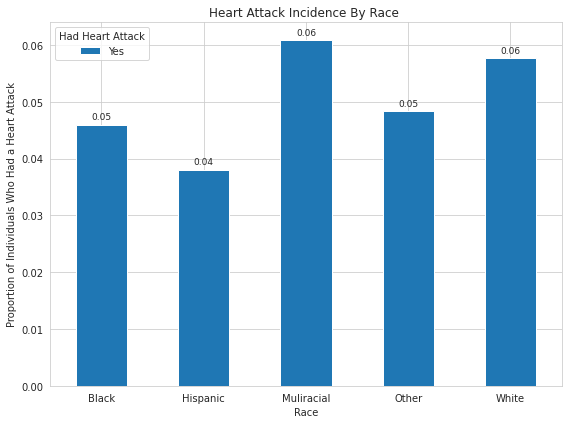

In [67]:

category_order = ["Yes"]
crosstab = pd.crosstab(cdc_survey_data["RaceEthnicityCategory"], cdc_survey_data["HadHeartAttack"], normalize="index") 
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["Black","Hispanic", "Muliracial", "Other","White" ], rotation=0)

x.set_xlabel("Race")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Incidence By Race ")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

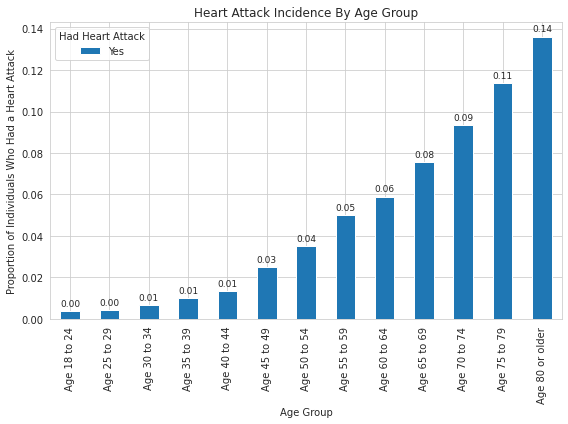

In [13]:
# Features 

#Age 
category_order = ["Yes"]
crosstab = pd.crosstab(cdc_survey_data["AgeCategory"], cdc_survey_data["HadHeartAttack"], normalize="index") 
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))


x.set_xlabel("Age Group")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Incidence By Age Group")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



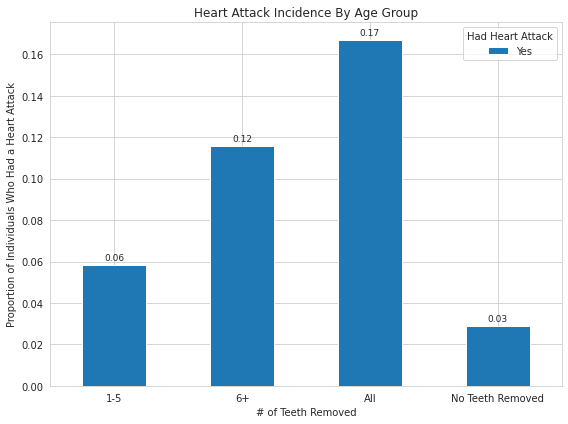

In [14]:
# Teeth Removal 
category_order = ["Yes"]
crosstab = pd.crosstab(cdc_survey_data["RemovedTeeth"], cdc_survey_data["HadHeartAttack"], normalize="index") 
crosstab = crosstab[category_order]

x = crosstab.plot(kind="bar", stacked=False,color="#1f77b4", figsize=(8,6))
x. set_xticklabels(["1-5","6+", "All", "No Teeth Removed", ], rotation=0)

x.set_xlabel("# of Teeth Removed")
x.set_ylabel("Proportion of Individuals Who Had a Heart Attack")
x.set_title("Heart Attack Incidence By Age Group")
x.legend(title="Had Heart Attack")

for bar in x.patches:
    height = bar.get_height()
    x.annotate(f"{height:.2f}", 
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3), 
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



In [15]:
disease_data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

print(disease_data.head())

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

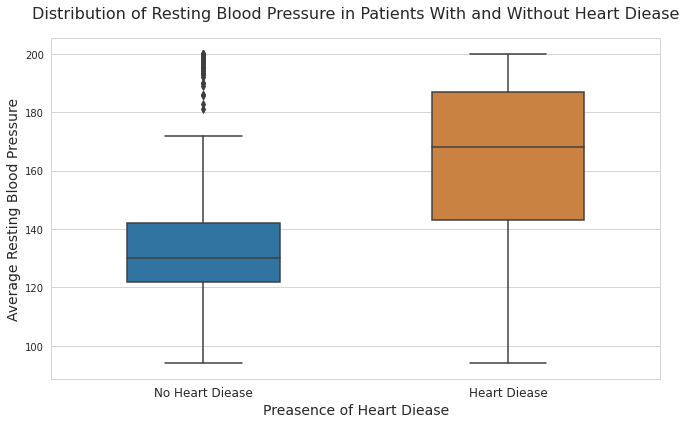

In [16]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create an improved boxplot
ax = sns.boxplot(x="target", y="restingBP", 
                data=disease_data,  
                palette=["#1f77b4", "#E1812C"],
                width=0.5,
               )



plt.title("Distribution of Resting Blood Pressure in Patients With and Without Heart Diease", fontsize=16, pad=20)
plt.xlabel("Preasence of Heart Diease", fontsize=14)
plt.ylabel("Average Resting Blood Pressure", fontsize=14)

plt.xticks([0, 1], ["No Heart Diease", "Heart Diease"], fontsize=12)




plt.tight_layout()
plt.show()

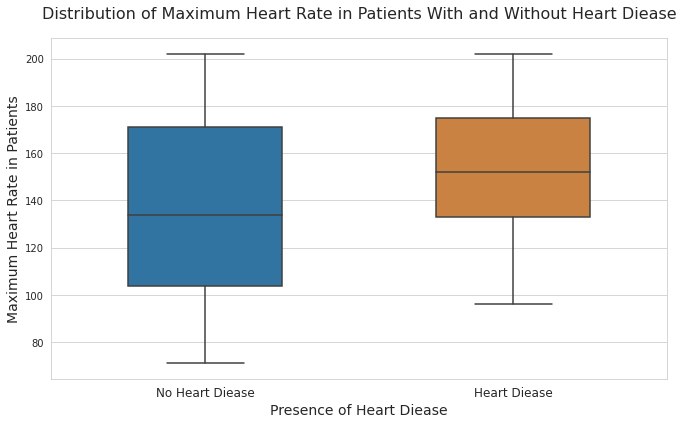

In [17]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create an improved boxplot
ax = sns.boxplot(x="target", y="maxheartrate", 
                data=disease_data,  
                palette=["#1f77b4", "#E1812C"],
                width=0.5,
               )



plt.title("Distribution of Maximum Heart Rate in Patients With and Without Heart Diease", fontsize=16, pad=20)
plt.xlabel("Presence of Heart Diease", fontsize=14)
plt.ylabel("Maximum Heart Rate in Patients", fontsize=14)

plt.xticks([0, 1], ["No Heart Diease", "Heart Diease"], fontsize=12)




plt.tight_layout()
plt.show()

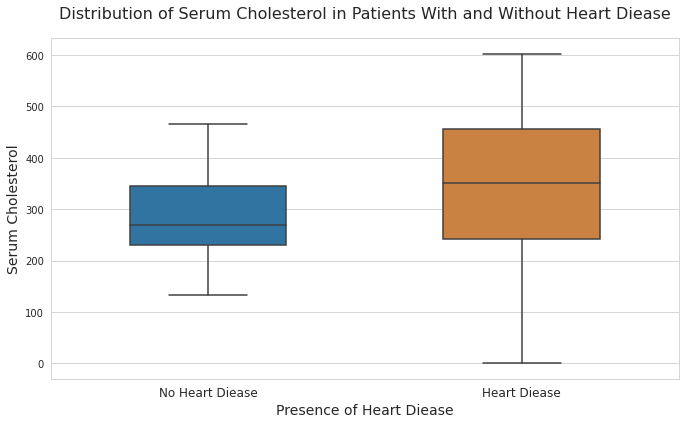

In [18]:
#Serum Cholesterol amount of cholesterol in blood 

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create an improved boxplot
ax = sns.boxplot(x="target", y="serumcholestrol", 
                data=disease_data,  
                palette=["#1f77b4", "#E1812C"],
                width=0.5,
               )



plt.title("Distribution of Serum Cholesterol in Patients With and Without Heart Diease", fontsize=16, pad=20)
plt.xlabel("Presence of Heart Diease", fontsize=14)
plt.ylabel("Serum Cholesterol", fontsize=14)

plt.xticks([0, 1], ["No Heart Diease", "Heart Diease"], fontsize=12)




plt.tight_layout()
plt.show()

In [68]:
# Random Forest Classifier

cdc_encoded = pd.get_dummies(cdc_survey_data, drop_first=True)

predictors = cdc_encoded.drop('HadHeartAttack_Yes', axis=1)
target = cdc_encoded['HadHeartAttack_Yes']

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.2, random_state=42)#80/20 training test split

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
model.fit(predictors_train, target_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target_pred = model.predict(predictors_test)

print("Accuracy:", accuracy_score(target_test, target_pred))
print("Confusion Matrix:\n", confusion_matrix(target_test, target_pred))
print("Classification Report:\n", classification_report(target_test, target_pred))


Accuracy: 0.9480743826846865
Confusion Matrix:
 [[46366   207]
 [ 2348   284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     46573
           1       0.58      0.11      0.18      2632

    accuracy                           0.95     49205
   macro avg       0.77      0.55      0.58     49205
weighted avg       0.93      0.95      0.93     49205



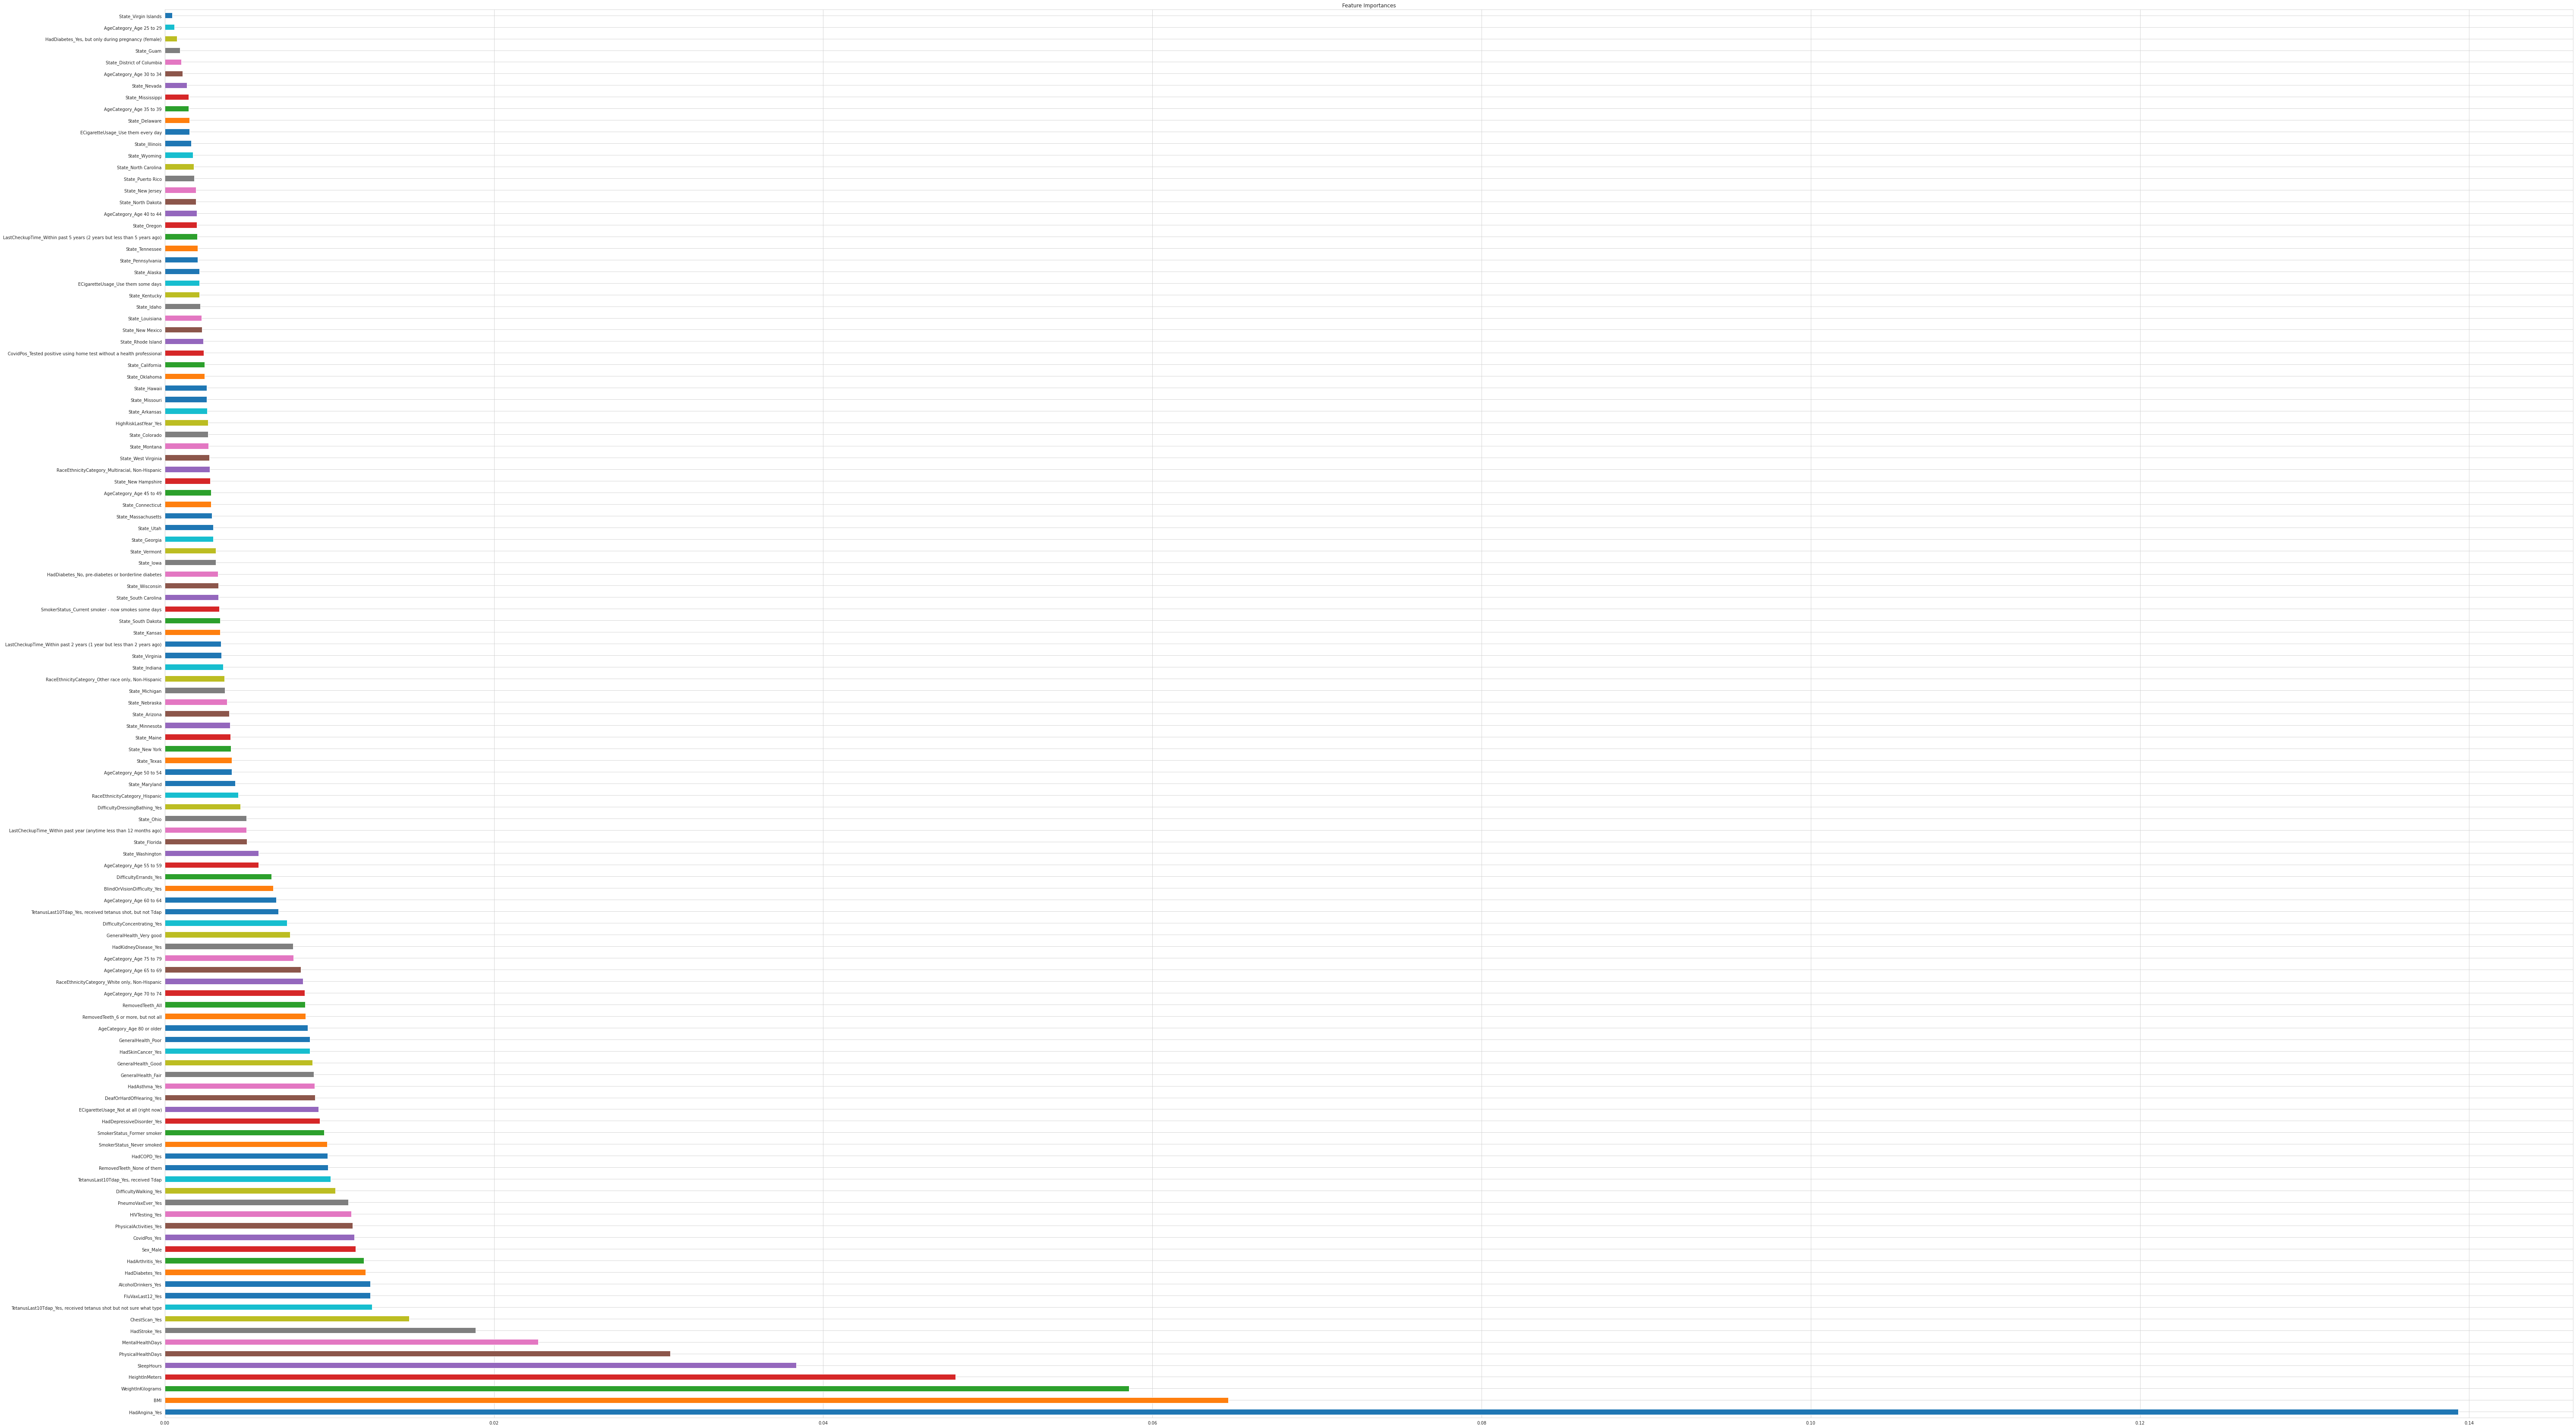

In [24]:
# Get imoratnace of feautres 
importances = pd.Series(model.feature_importances_, index=predictors.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(100, 60))
plt.title("Feature Importances")
plt.show()

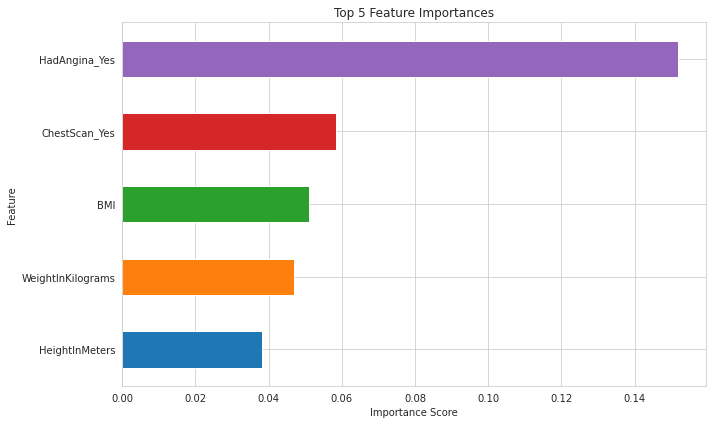

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


importances = pd.Series(model.feature_importances_, index=predictors.columns)

sorted_importances = importances.sort_values(ascending=False)

top_5_importances = sorted_importances.head(5)

top_5_importances.sort_values(ascending=True).plot(
    kind='barh',
    figsize=(10, 6)
)


plt.title("Top 5 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
cdc_encoded

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_Alaska,State_Arizona,State_Arkansas,State_California,...,AlcoholDrinkers_Yes,HIVTesting_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,4.0,0.0,9.0,1.60,71.67,27.99,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0.0,0.0,6.0,1.78,95.25,30.13,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,0.0,0.0,8.0,1.85,108.86,31.66,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,5.0,0.0,9.0,1.70,90.72,31.32,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,3.0,15.0,5.0,1.55,79.38,33.07,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5,0.0,0.0,7.0,1.85,120.20,34.96,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
6,3.0,0.0,8.0,1.63,88.00,33.30,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7,5.0,0.0,8.0,1.75,74.84,24.37,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
8,2.0,0.0,6.0,1.70,78.02,26.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0.0,0.0,7.0,1.68,63.50,22.60,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
